In [19]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load

In [22]:
#hists = load('hists/darkhiggs2018v11.scaled')
hists = load('/Users/hongjieun/MonoTop/small_monotop2018.scaled')

In [23]:
hists['recoil'].identifiers('process')

[<StringBin (ZJetsHF) instance at 0x119c23bd0>,
 <StringBin (ZJetsLF) instance at 0x119b945d0>,
 <StringBin (MET) instance at 0x119746e90>]

In [24]:
process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)

signal_hists = {}
bkg_hists = {}
data_hists = {}

bkg_map = OrderedDict()

bkg_map["Hbb_merged"] = ("Hbb_merged*",)
bkg_map["Hbb_unmerged"] = ("Hbb_unmerged*",)
bkg_map["VVqq"] = ("VVqq*",)
bkg_map["VVbb"] = ("VVbb*",)
bkg_map["VVother"] = ("VVother*",)
bkg_map["STbqq"] = ("STbqq*",)
bkg_map["STqq"] = ("STqq*",)
bkg_map["STother"] = ("STother*",)
bkg_map["TTbqq"] = ("TTbqq*",)
bkg_map["TTqq"] = ("TTqq*",)
bkg_map["TTother"] = ("TTother*",)
bkg_map["DYJetsHF"] = ("DYJetsHF*",)
bkg_map["DYJetsLF"] = ("DYJetsLF*",)
bkg_map["WJetsHF"] = ("WJetsHF*",)
bkg_map["WJetsLF"] = ("WJetsLF*",)
bkg_map["ZJetsHF"] = ("ZJetsHF*",)
bkg_map["ZJetsLF"] = ("ZJetsLF*",)
bkg_map["GJetsHF"] = ("GJetsHF*",)
bkg_map["GJetsLF"] = ("GJetsLF*",)
bkg_map["QCD"] = ("QCD*",)

signal_map = OrderedDict()
signal_map["Monotop"] = ("Vector_Monotop*")

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("SingleElectron*", )
data_map["SinglePhoton"] = ("SinglePhoton*", )


for key in hists.keys():                                                                                                                            
    bkg_hists[key] = hists[key].group(cats, process, bkg_map)  
    signal_hists[key] = hists[key].group(cats, process, signal_map)
    data_hists[key] = hists[key].group(cats, process, data_map)

In [25]:
signal_map

OrderedDict([('Monotop', 'Vector_Monotop*')])

In [26]:
exp = 0
region = 'sr'
sys = 'nominal'
data={}
data['sr'] = 'MET'
data['wmcr'] = 'MET'
data['tmcr'] = 'MET'
data['wecr'] = 'SingleElectron'
data['tecr'] = 'SingleElectron'
data['zmcr'] = 'MET'
data['zecr'] = 'SingleElectron'
data['gcr'] = 'SinglePhoton'

variable = 'recoil'
cut_bin = 0
#cut_value_array = bkg_hists[variable].integrate('systematic',sys).integrate('region','sr').integrate('process', 'Mhs_50').axis(variable).edges(overflow='all')

print('------------------------')
print('------------------------')
print('Category:', region)
print('Systematic:', sys)
#print('------------------------')
if cut_bin!=0: print(variable,'> %.2f' % cut_value_array[()][cut_bin])
print('------------------------')
print('------------------------')
for p in bkg_hists[variable].identifiers('process'):
    yld_array = bkg_hists[variable].integrate('systematic',sys).integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld_array:
        yld = np.cumsum(yld_array[()])[16] - np.cumsum(yld_array[()])[cut_bin]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

for p in signal_hists[variable].identifiers('process'):
    yld_array = signal_hists[variable].integrate('systematic',sys).integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld_array:
        yld = np.cumsum(yld_array[()])[16] - np.cumsum(yld_array[()])[cut_bin]
        print(p, '%.1f' % yld)
        print(p,'S/B %.3f' % (yld/exp))
        print(p,'S/sqrt(B) %.1f' % (yld/np.sqrt(exp)))
        #print(p,'Fraction %.2f' % (yld/np.cumsum(yld_array[()])[16]))
        print('------------------------')


if not region == 'sr':
    yld_array = data_hists[variable].integrate('systematic',sys).integrate('region',region).integrate('process', data[region.split('_')[0]]).values(overflow='all')
    if () in yld_array and 'iszeroL' not in region:
        yld = np.cumsum(yld_array[()])[16] - np.cumsum(yld_array[()])[cut_bin]
        print('Total observed:', '%.1f' % yld)   
print('------------------------')
print()

------------------------
------------------------
Category: sr
Systematic: nominal
------------------------
------------------------
ZJetsHF 0.0
ZJetsLF 5797.0
------------------------
Total expected: 5797.0
------------------------
------------------------



ValueError: plot1d() can only support up to two dimensions (one for axis, one to stack or overlay)

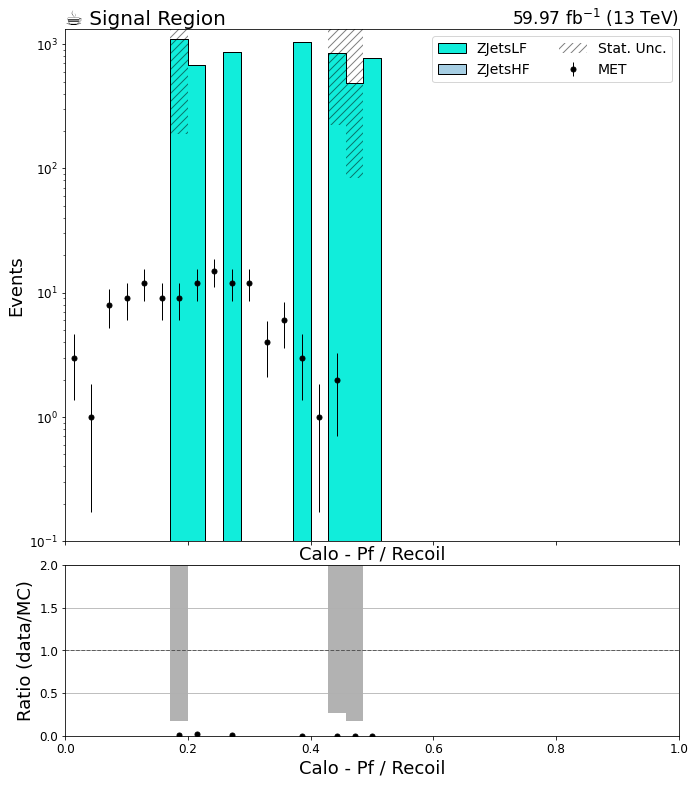

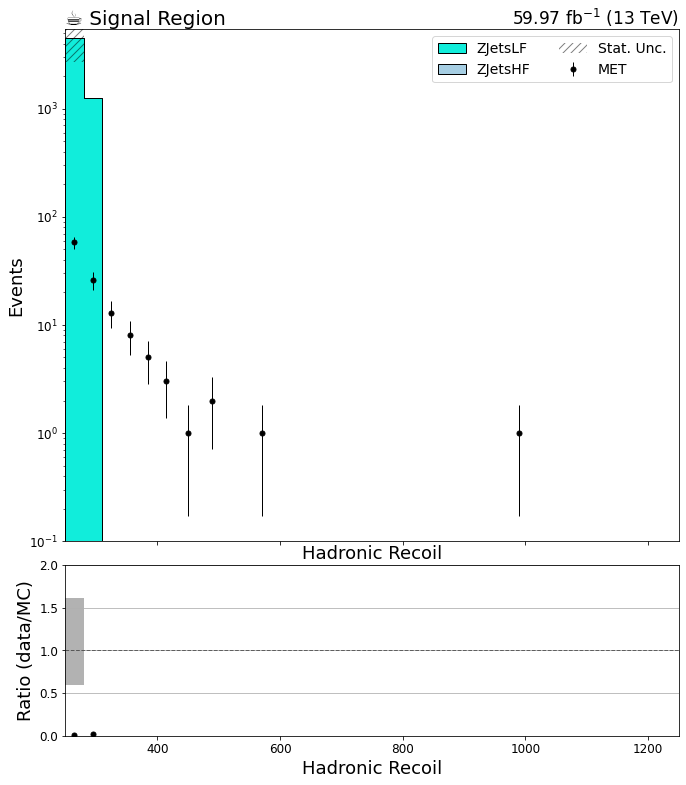

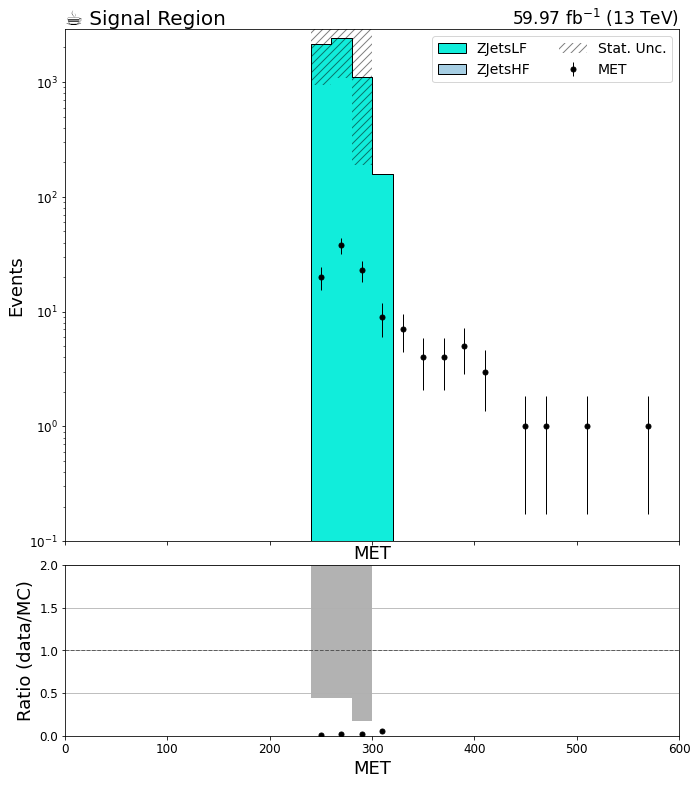

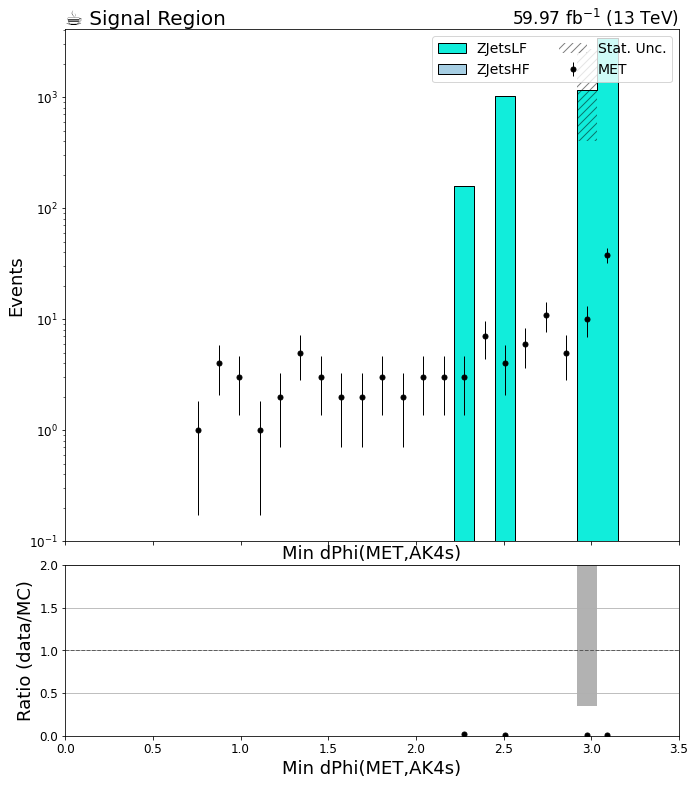

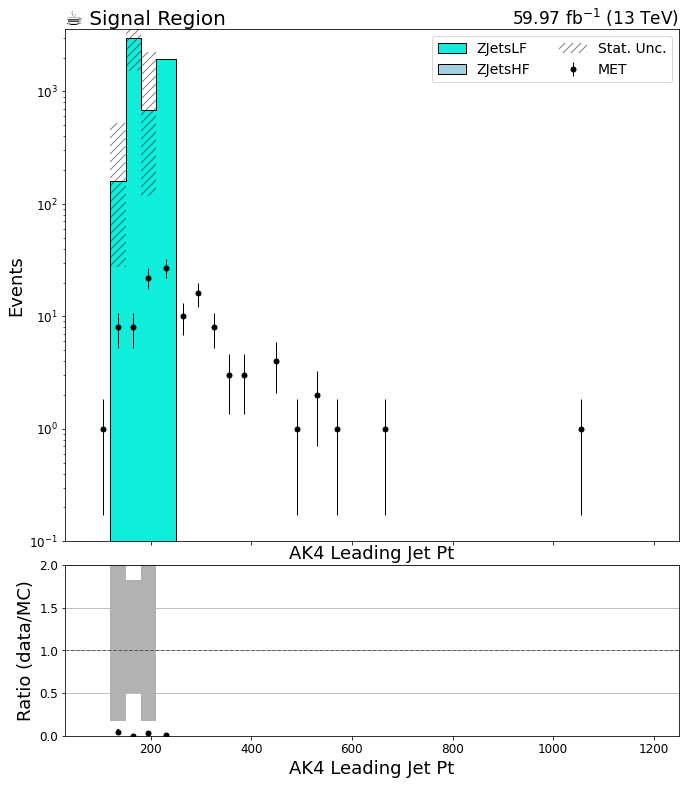

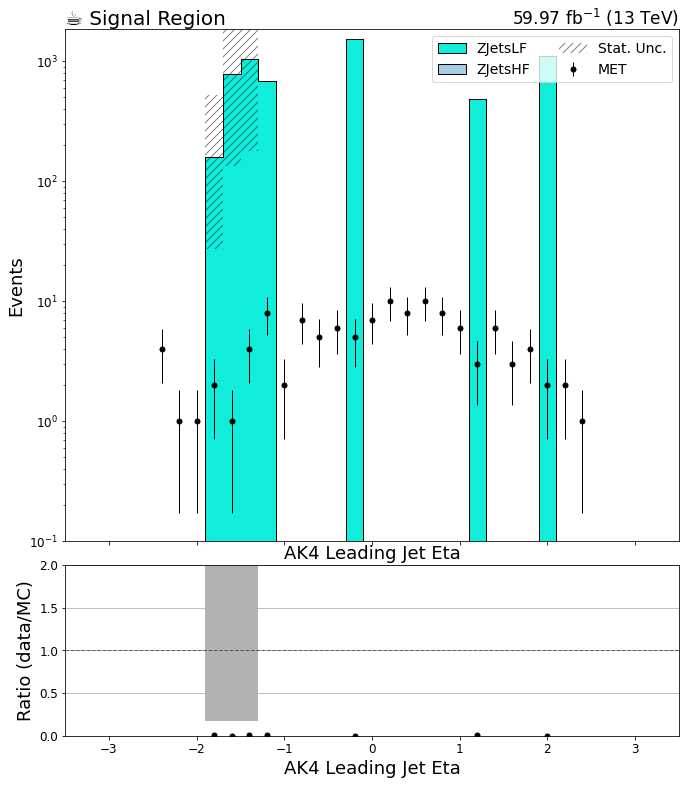

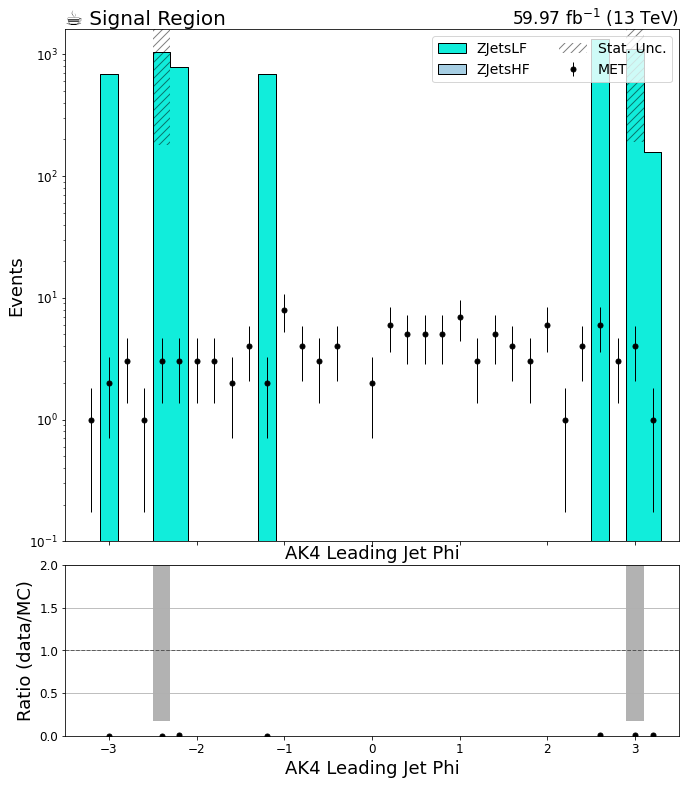

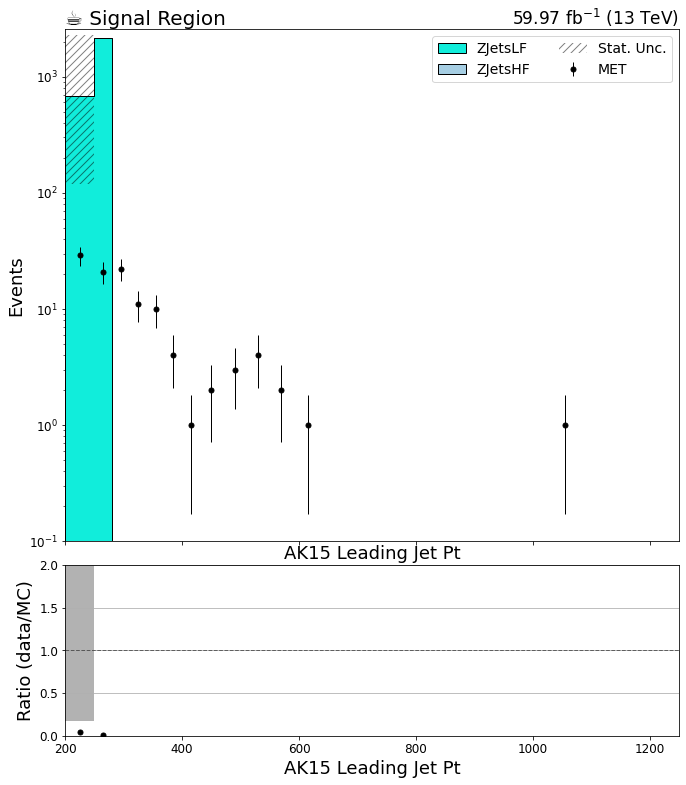

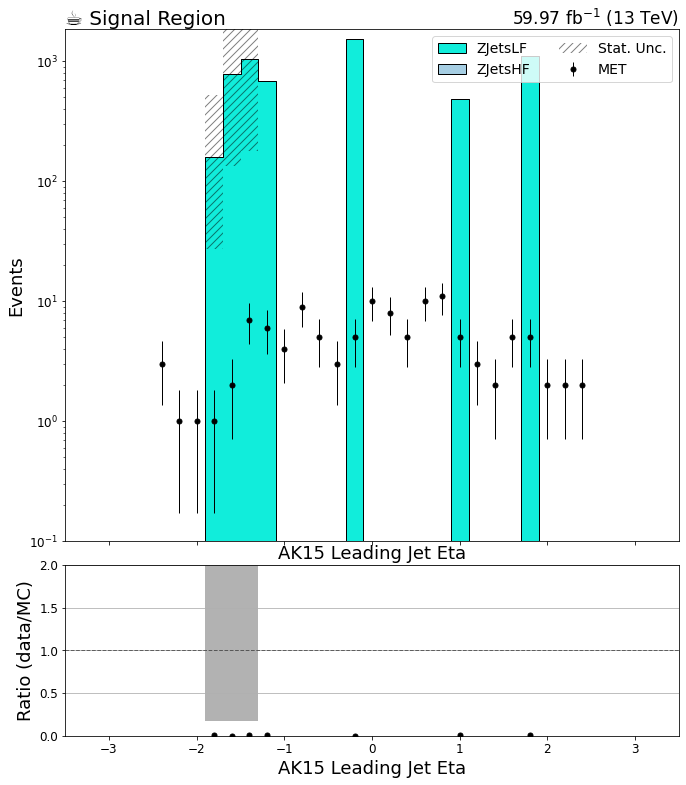

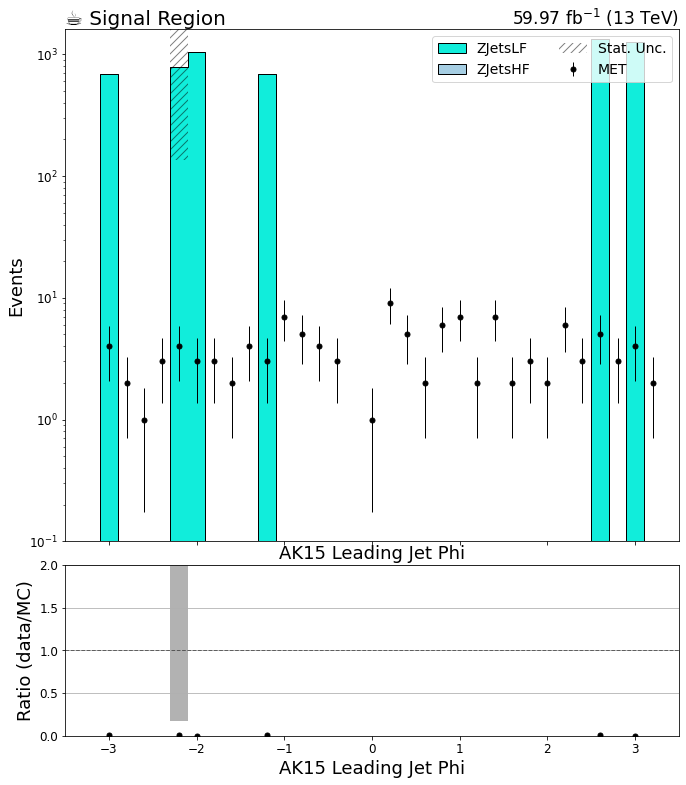

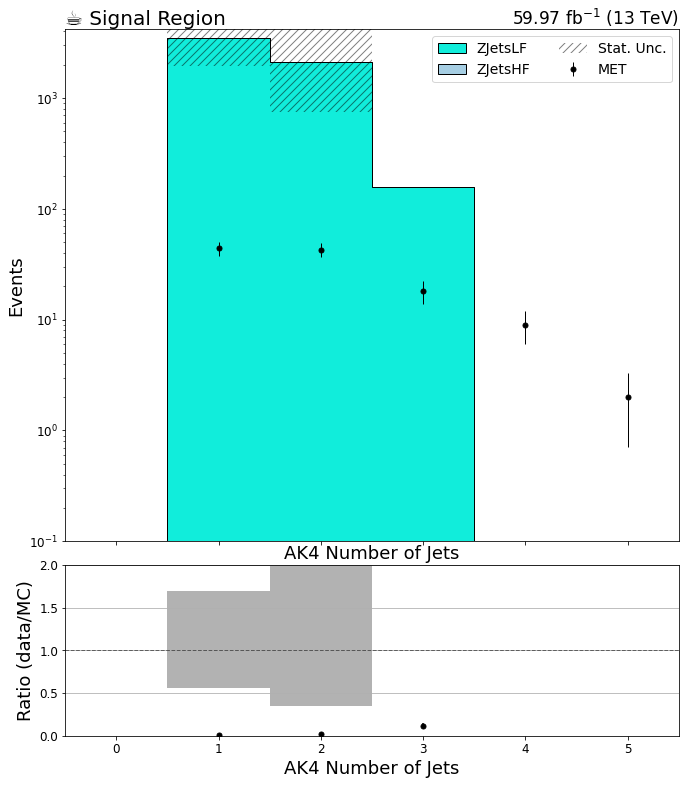

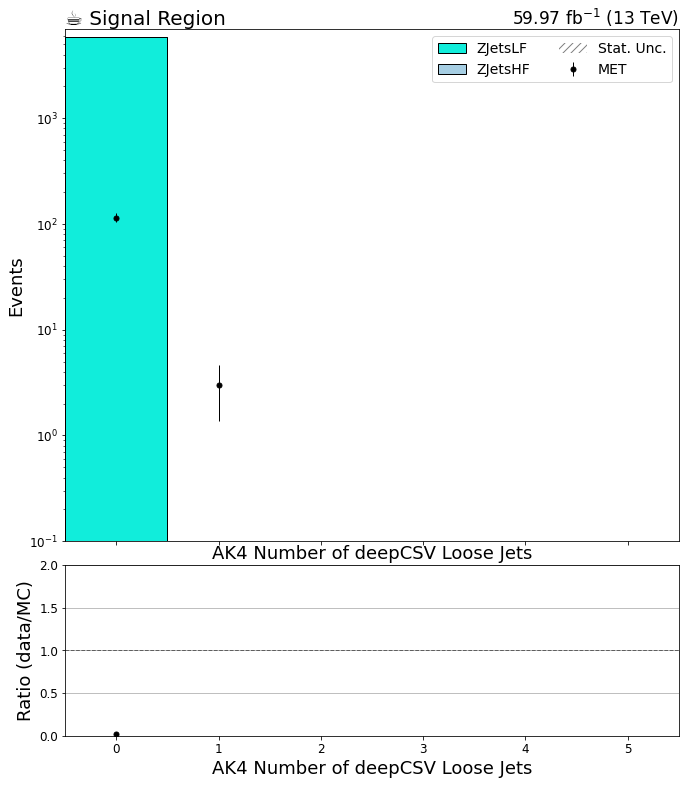

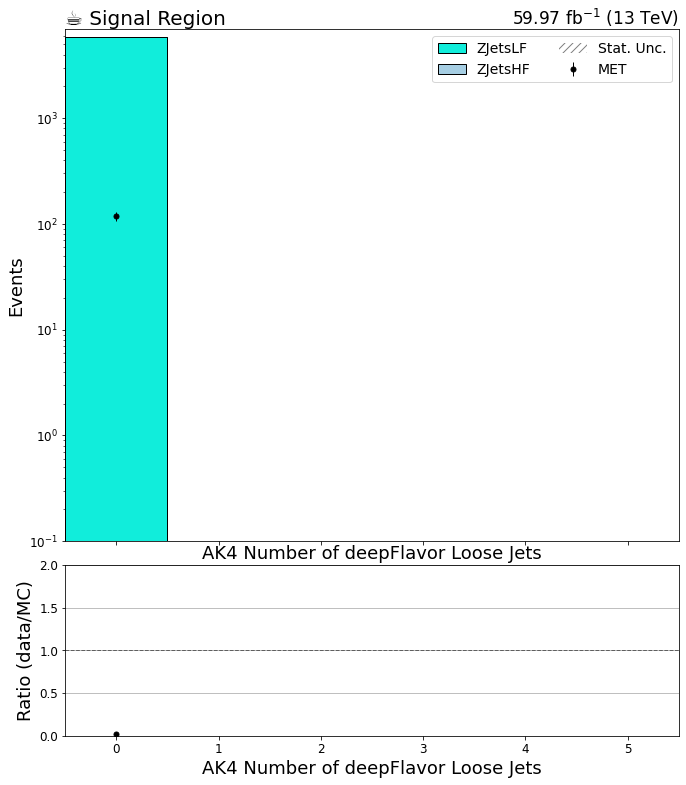

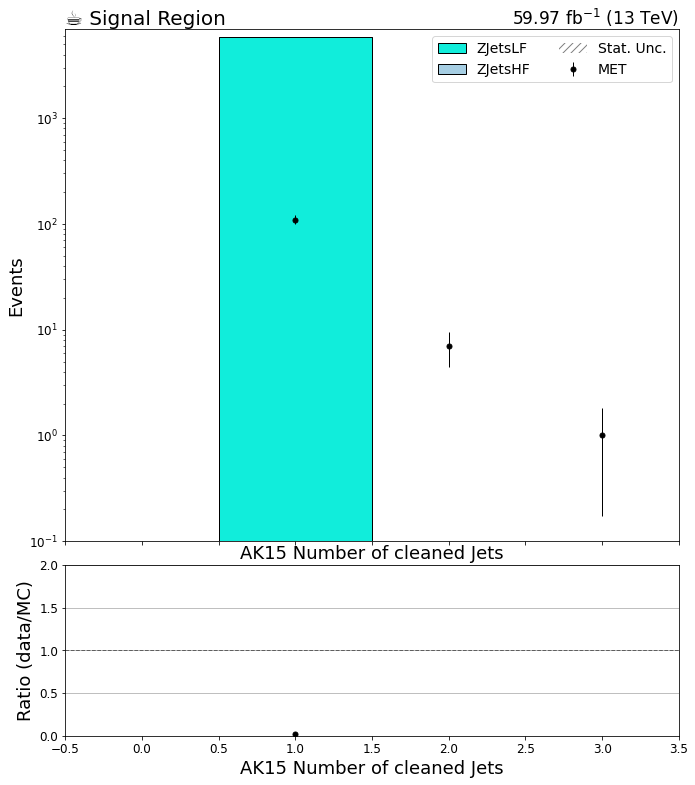

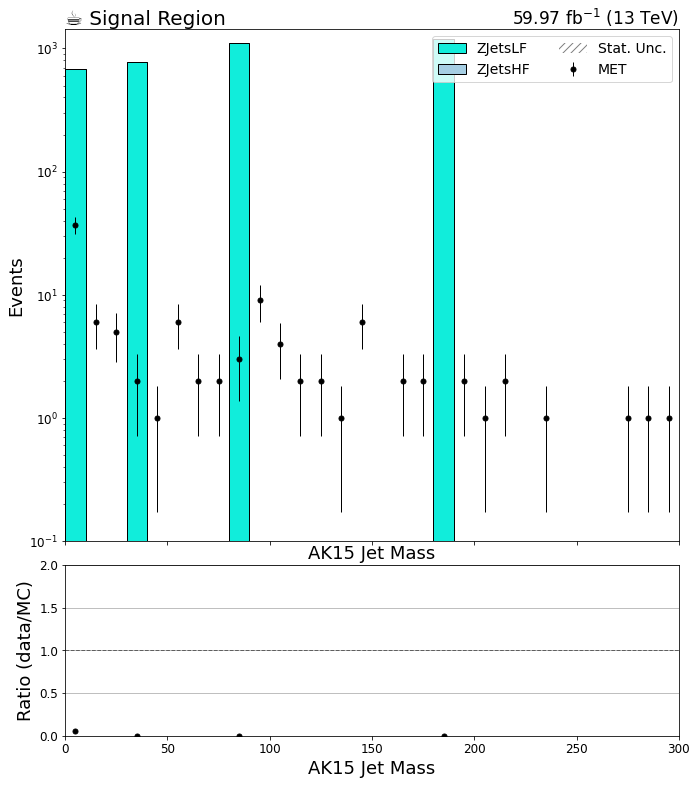

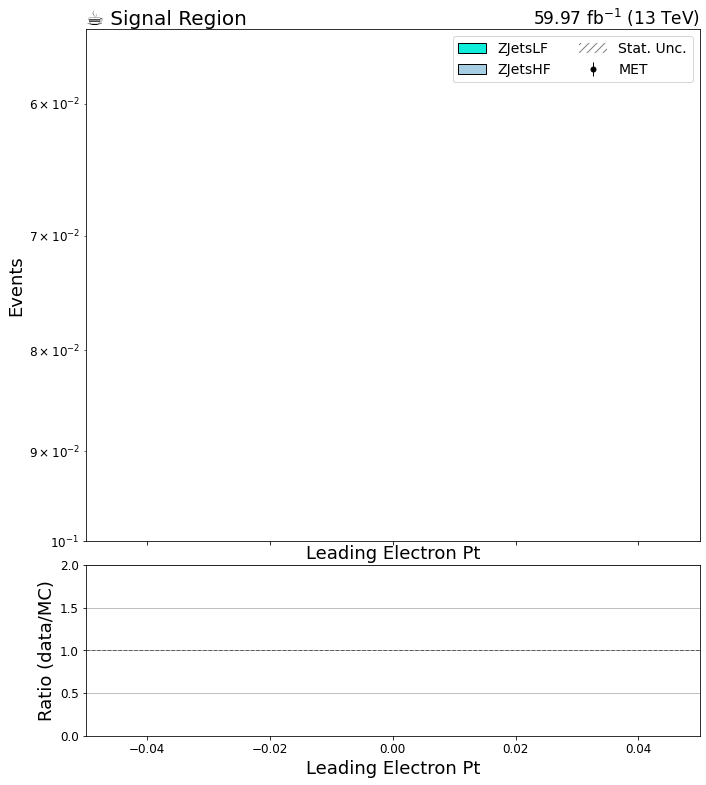

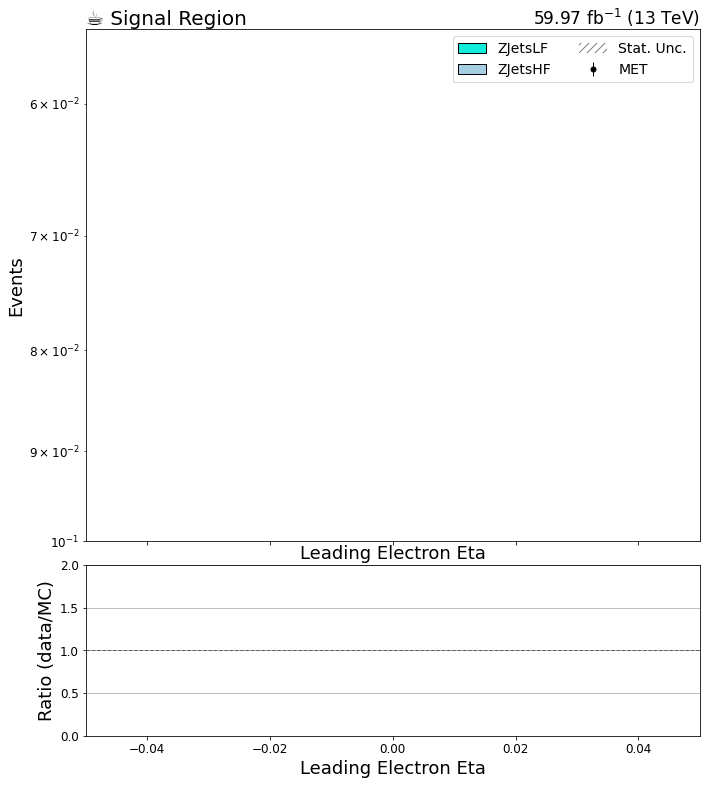

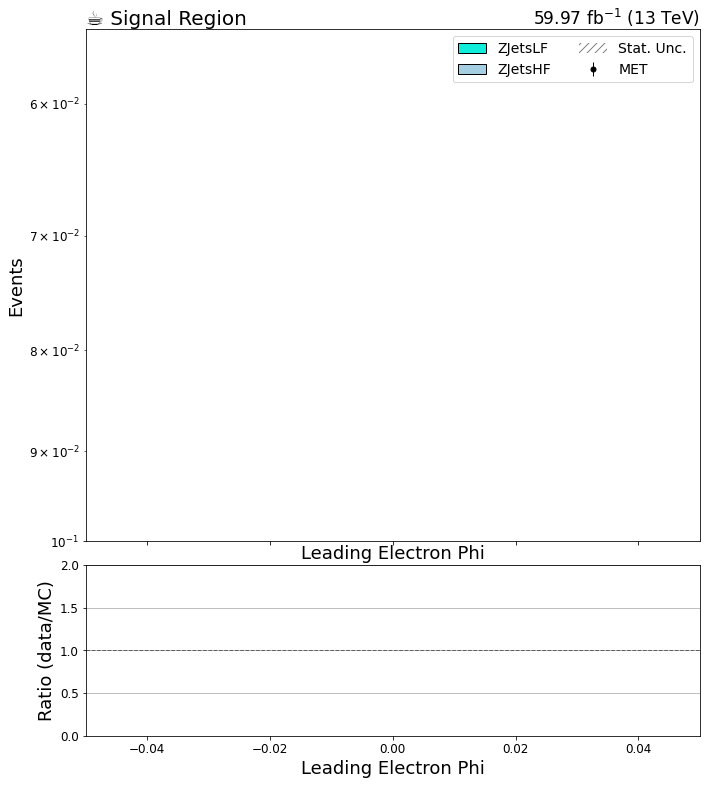

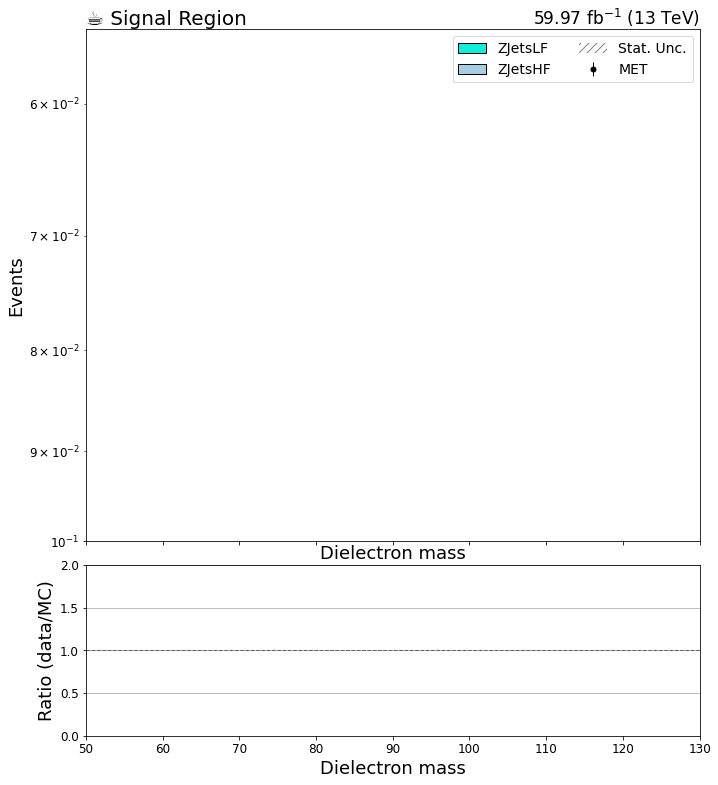

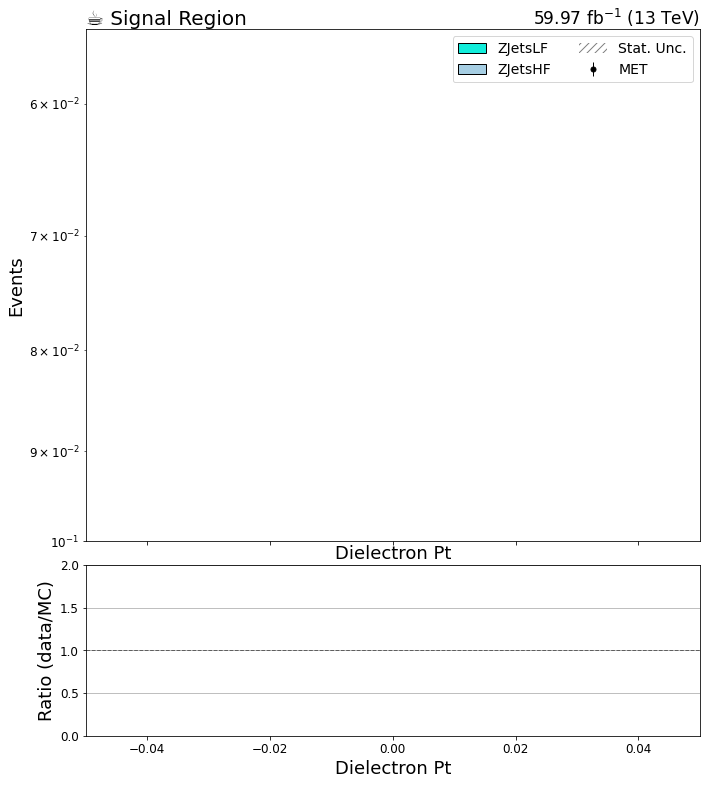

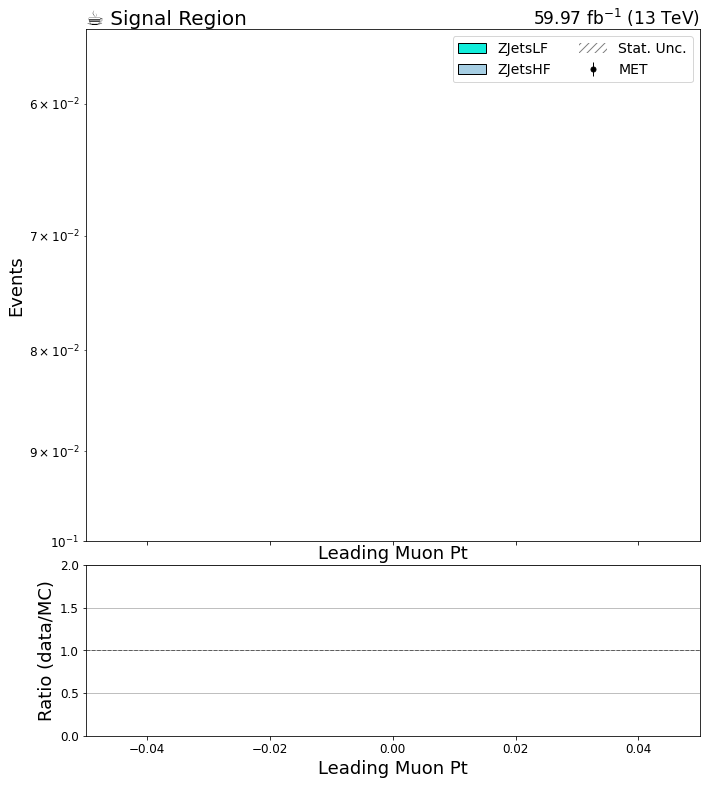

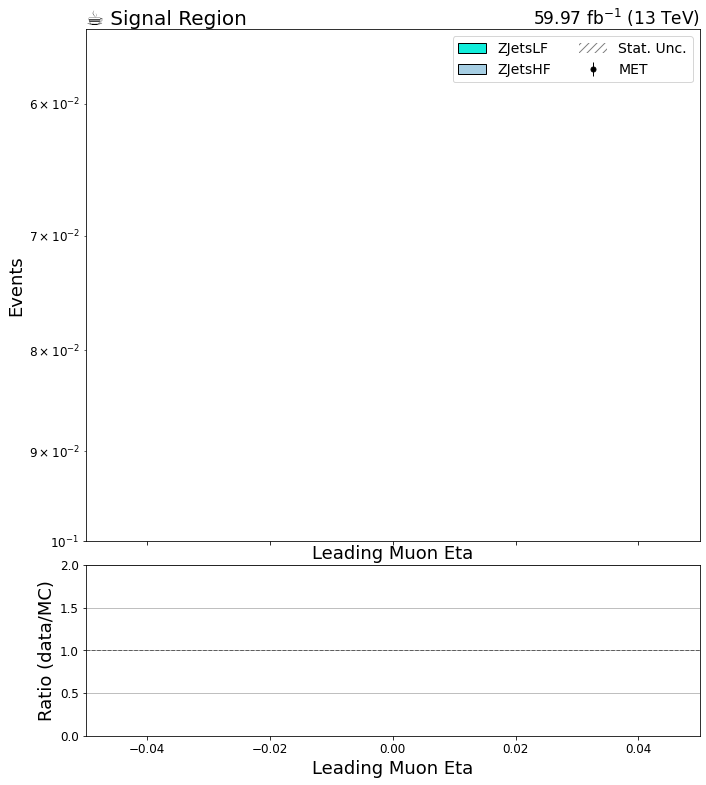

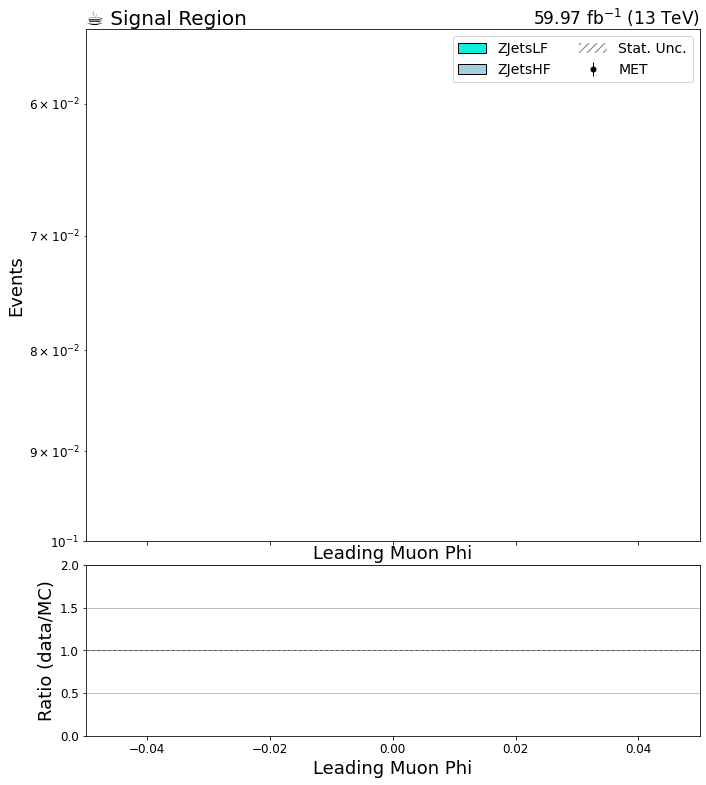

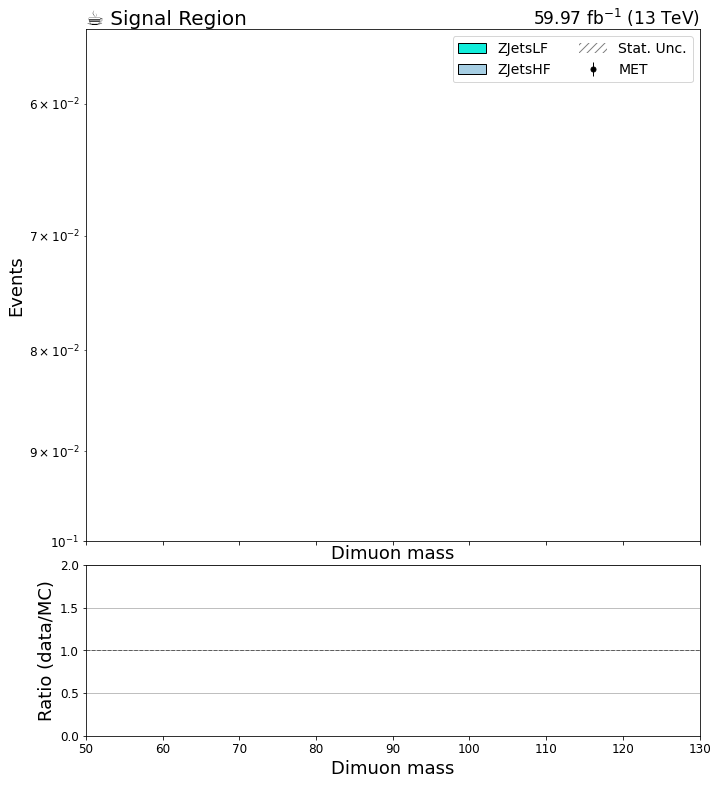

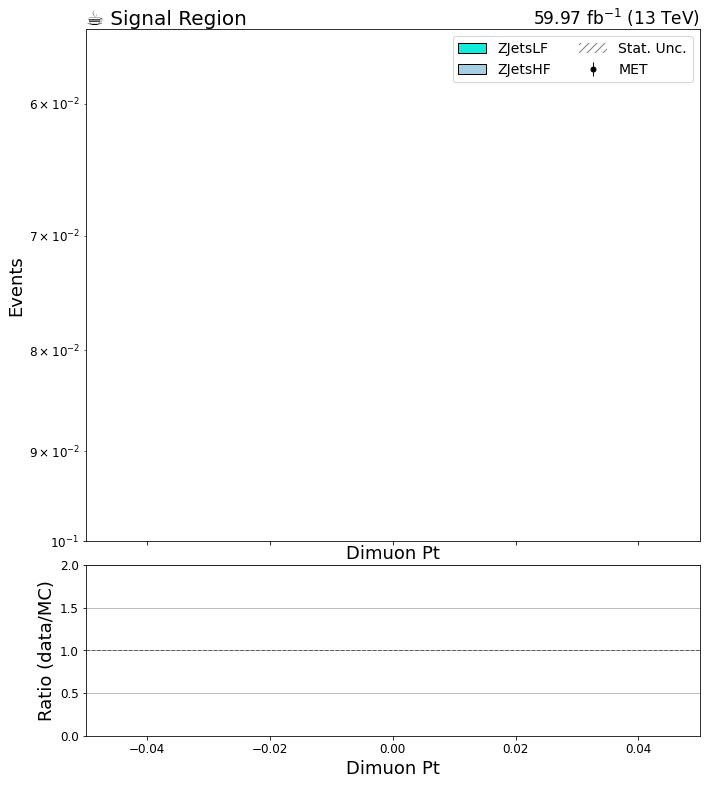

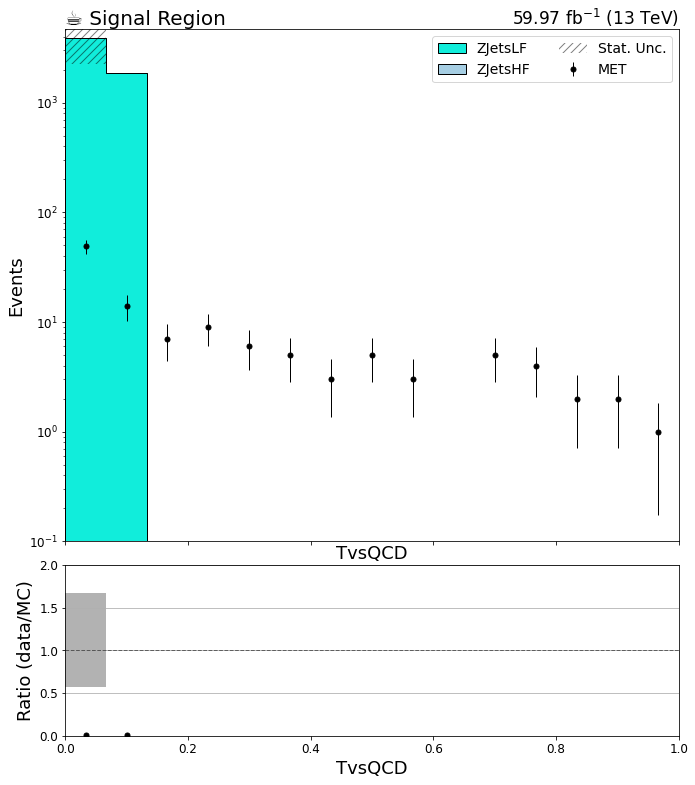

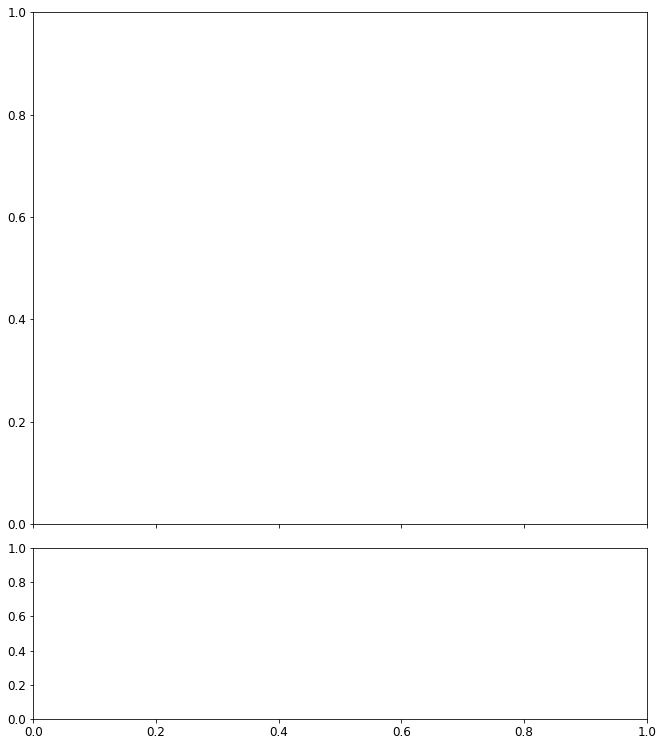

In [27]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler


if not os.path.exists('small_stack'):
    os.makedirs('small_stack')
    
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
R['zecr'] = 'Double Electron Z CR'
R['zmcr'] = 'Double Muon Z CR'
R['gcr'] = 'Single Photno CR'

sys = 'nominal'

for key in bkg_hists.keys():
    if key=='sumw': continue
    #if not (key == 'met' or key == 'dimupt'): continue
    #if not (key == 'e1pt' or key == 'e1eta'): continue 
   
    for j in bkg_hists[key].identifiers('region'):
        
        #if not (str(j) == 'zmcr' or str(j) == 'zecr'): continue
        #if 'mass' in str(j): continue
        #if 'mono' in str(j): continue
        #if str(j) == 'sr' or str(j) == 'gcr': continue
        #if 'ecr' in str(j): continue
        #if str(j) == 'wmcr' or str(j) == 'tmcr' or str(j) == 'wecr' or str(j) == 'tecr':
        #    if key == 'dielemass' or key == 'dimumass': continue
        if str(j) == 'wmcr' or str(j) == 'tmcr' or str(j) == 'zmcr':
            if key == 'e1pt' or key == 'e1eta' or key == 'e1phi': continue
        if str(j) == 'wecr' or str(j) == 'tecr' or str(j) == 'zecr':
            if key == 'mu1pt' or key == 'mu1eta' or key == 'mu1phi': continue
            
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        colors = ['#11eddb', '#a6cee3', '#1f78b4', '#e1e04f', '#b2df8a',
                  '#33a02c', '#ef4ff1', '#fb9a99', '#e31a1c', '#fdbf6f',
                  '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#e17412']
        if key == 'recoilVSmindphi' and str(j) == 'gcr':
            plot.plot2d(data_hists[key].integrate('systematic',sys).integrate('region',j)[data[str(j).split('_')[0]]],
                    overlay="process",
                    ax=ax,
                    clear=False,
                    error_opts=data_err_opts
                       )


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        

        plot.plot1d(data_hists[key].integrate('systematic',sys).integrate('region',j)[data[str(j).split('_')[0]]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('systematic',sys).integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('systematic',sys).integrate('region',j).integrate('process',data[str(j).split('_')[0]]), 
                   bkg_hists[key].integrate('systematic',sys).integrate('region',j).sum('process'),
                   ax=rax,
                   overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        plot_path = os.path.abspath('stack') 
        plot_name = 'small_stack_'+key+'_'+R[str(j).split('_')[0]]+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

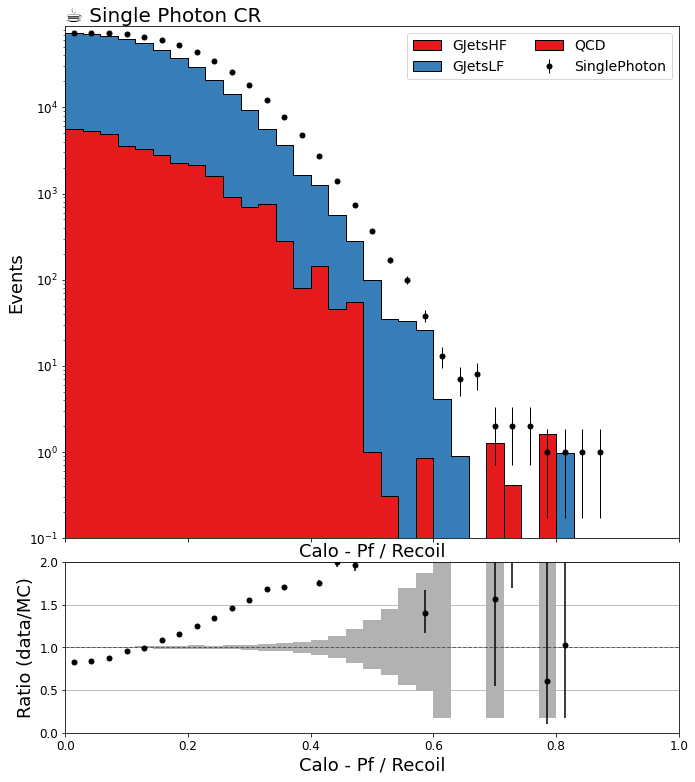

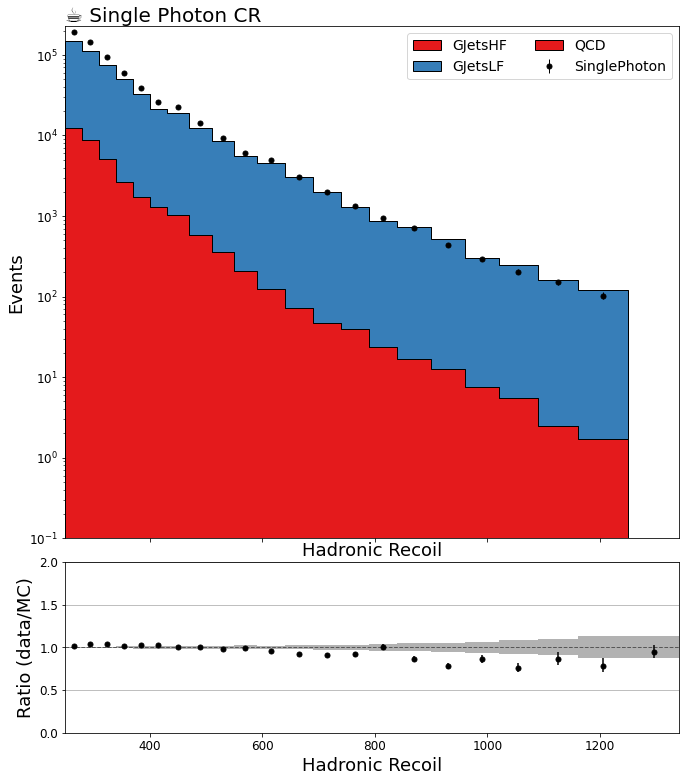

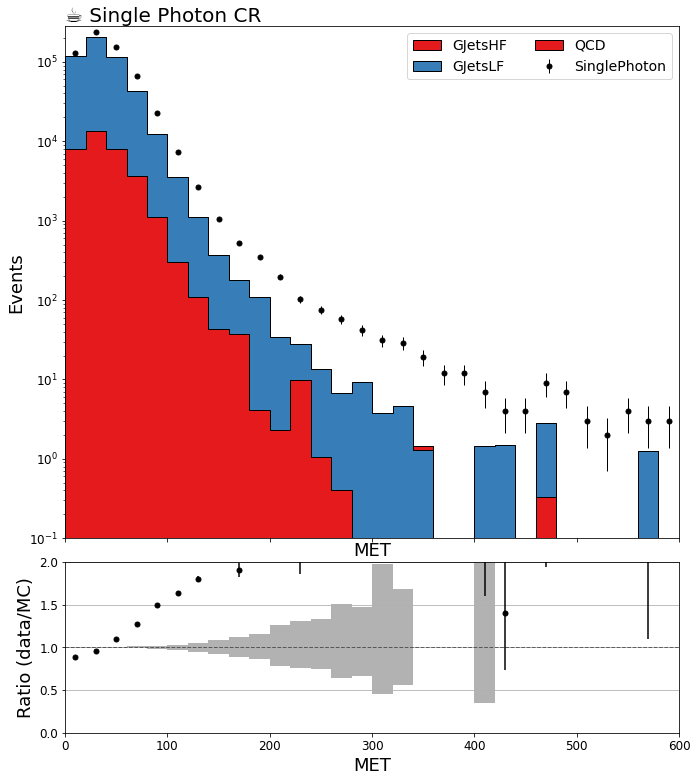

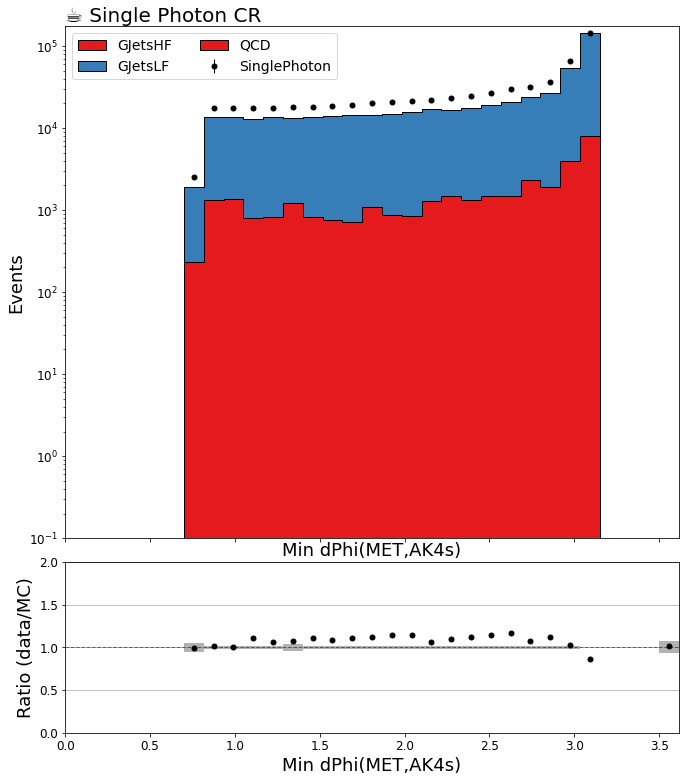

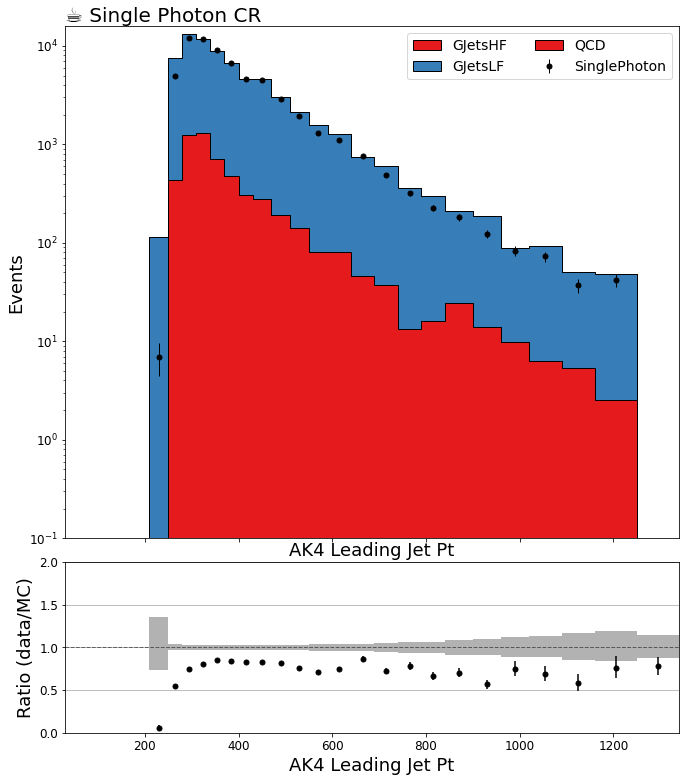

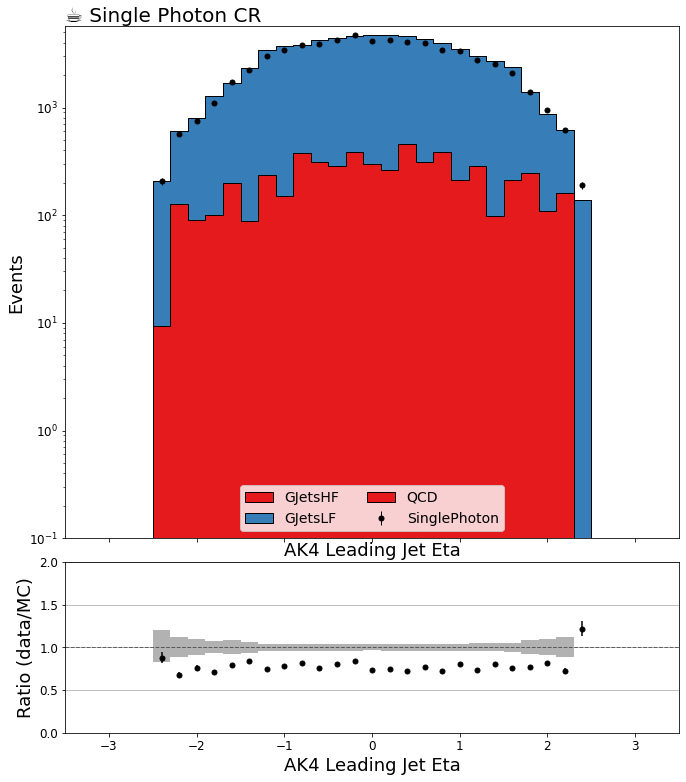

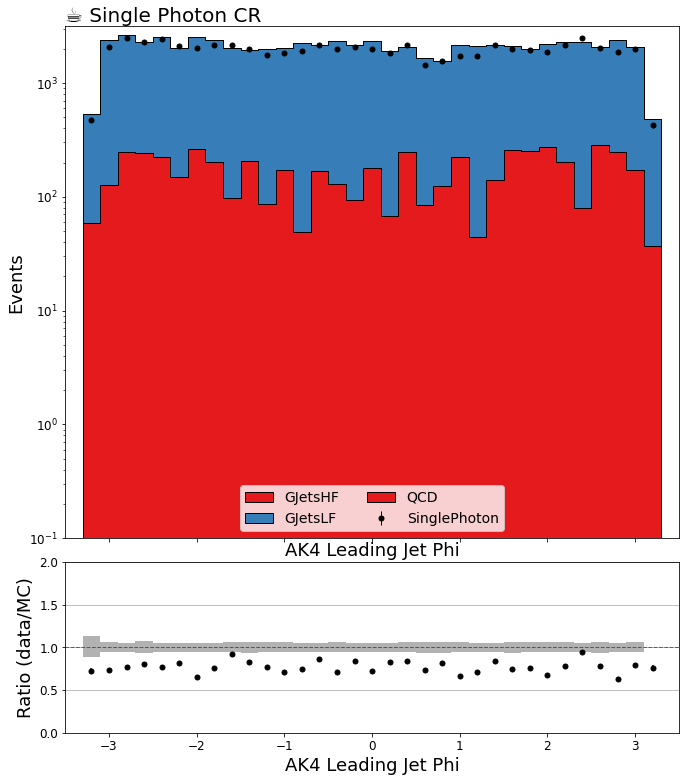

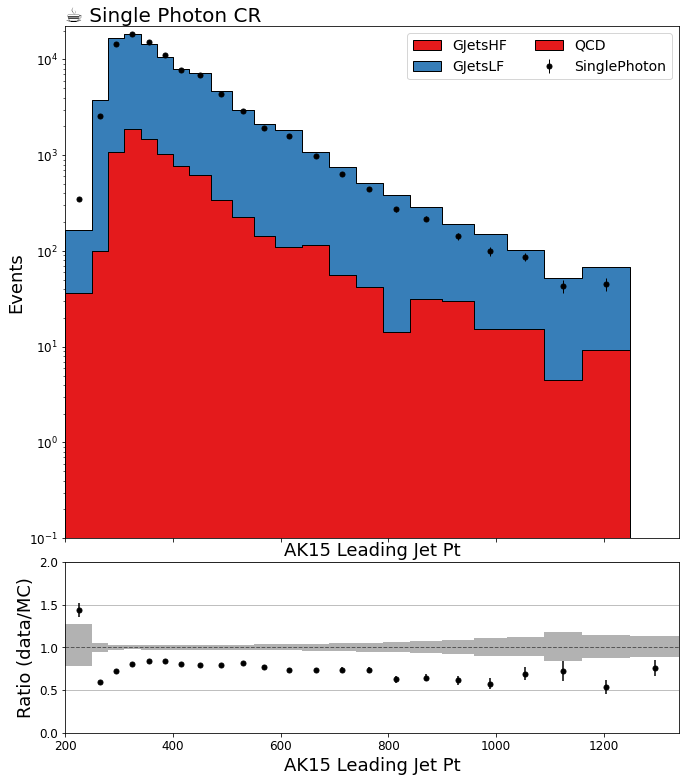

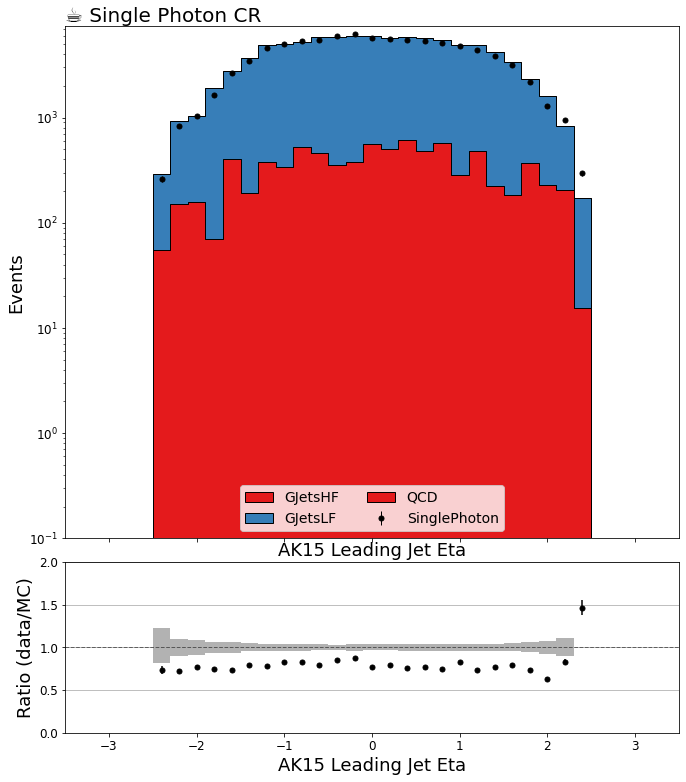

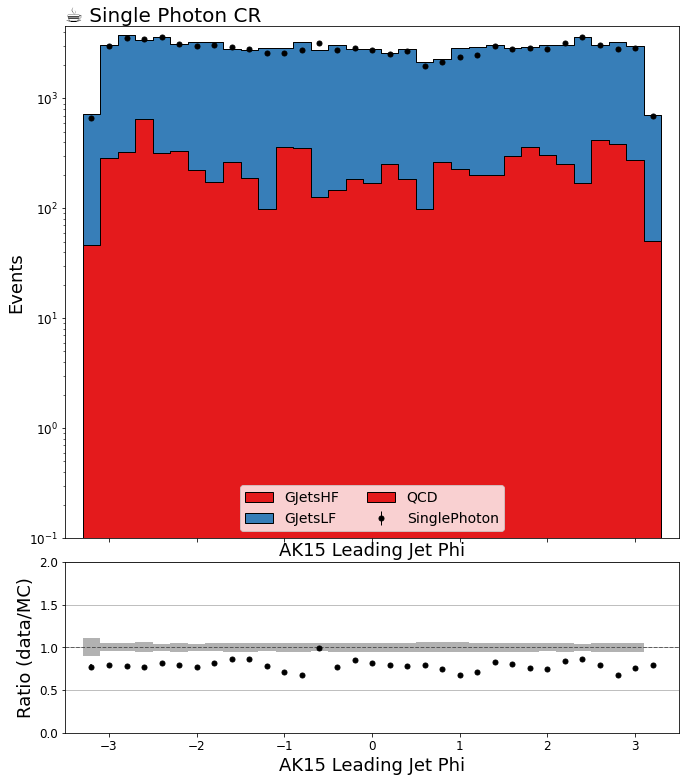

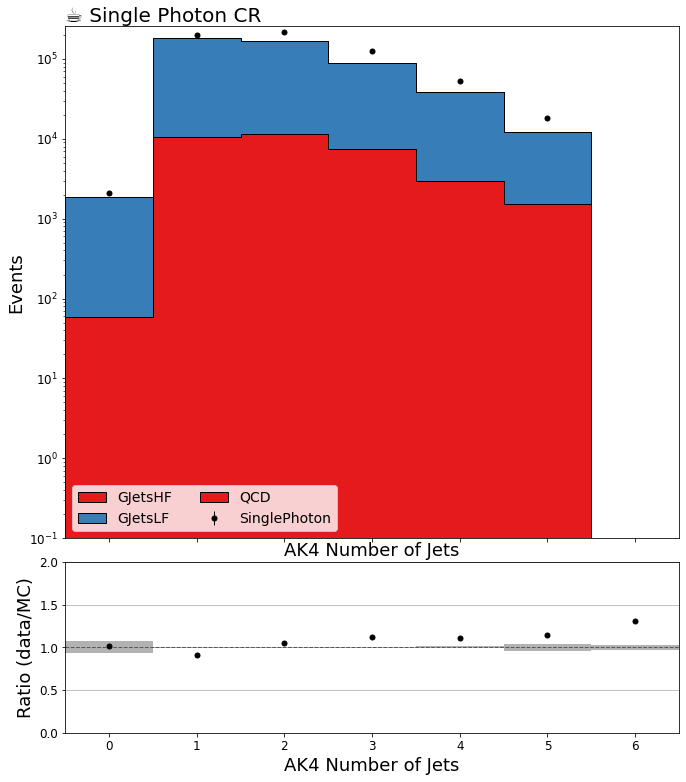

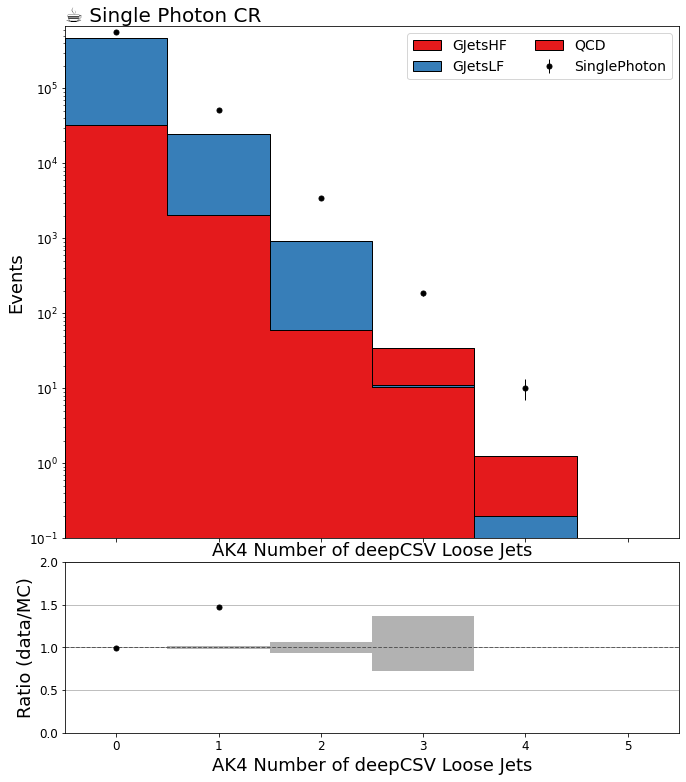

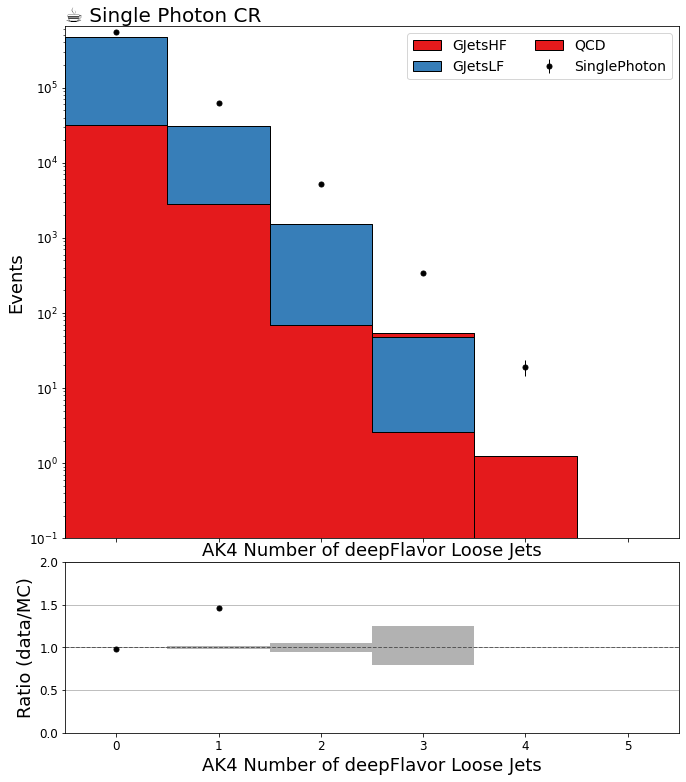

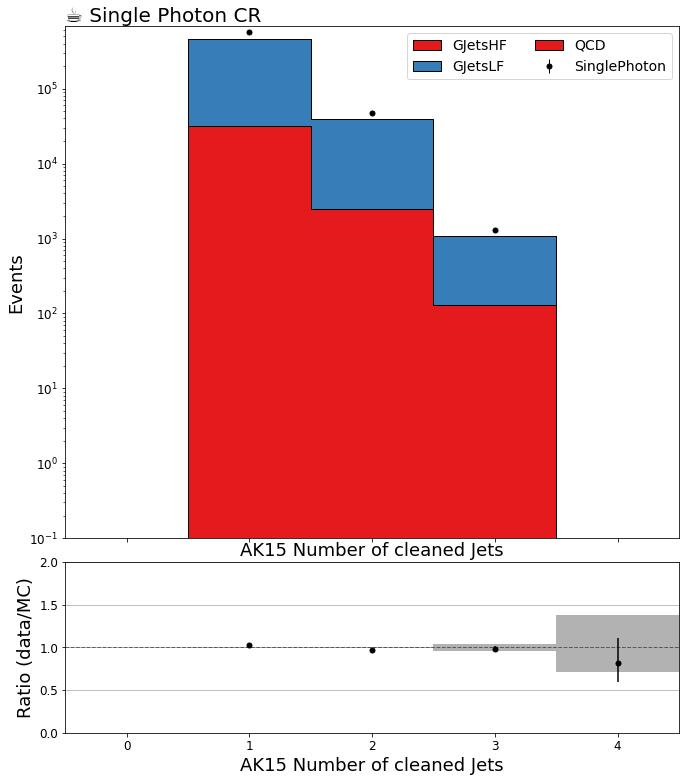

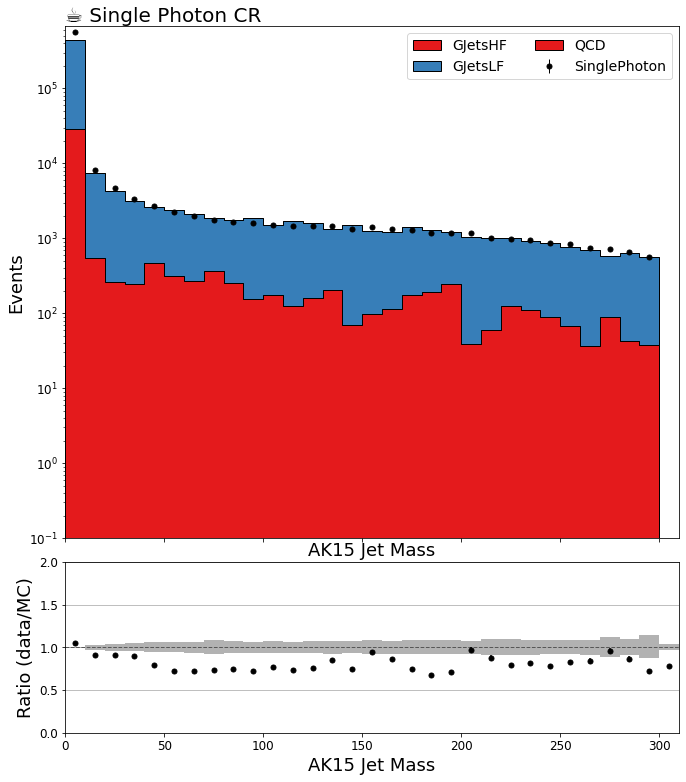

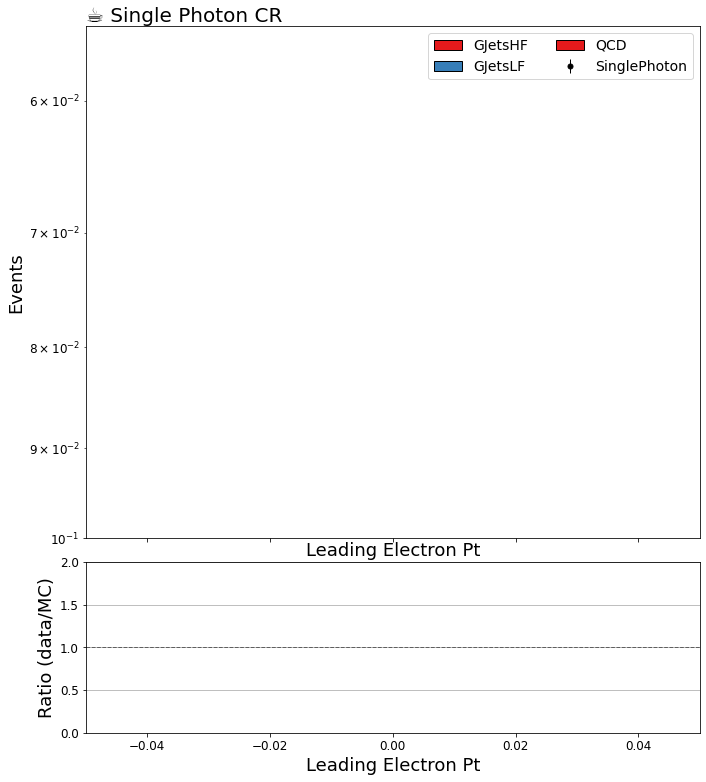

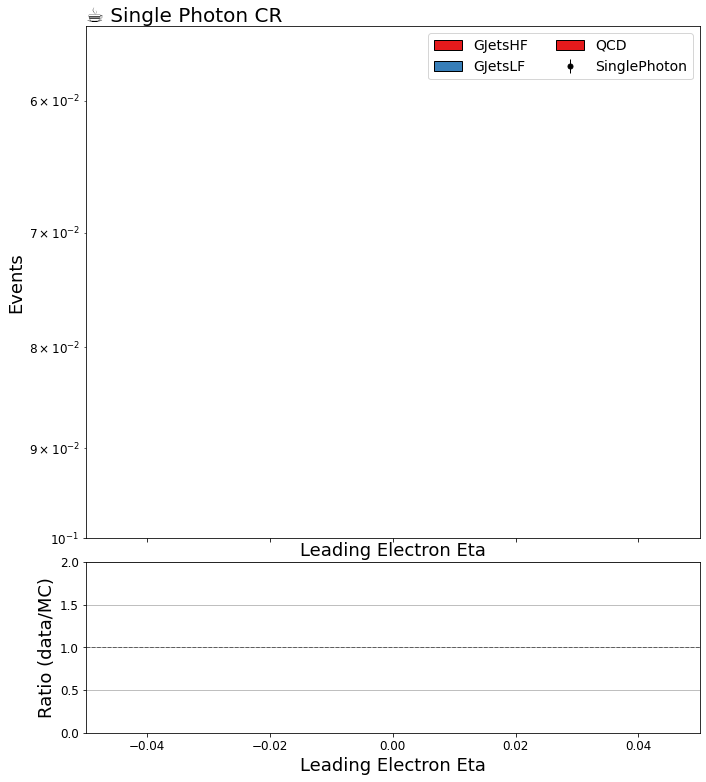

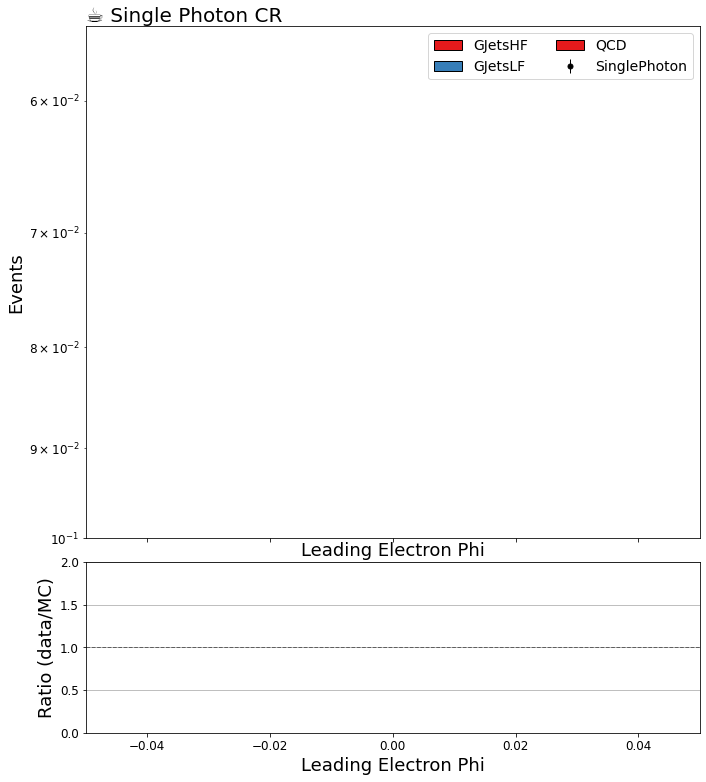

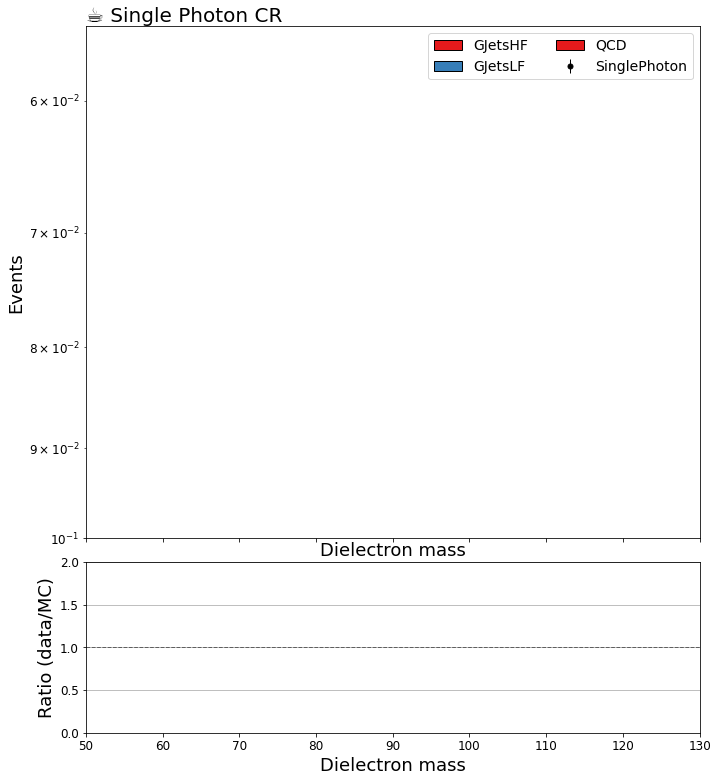

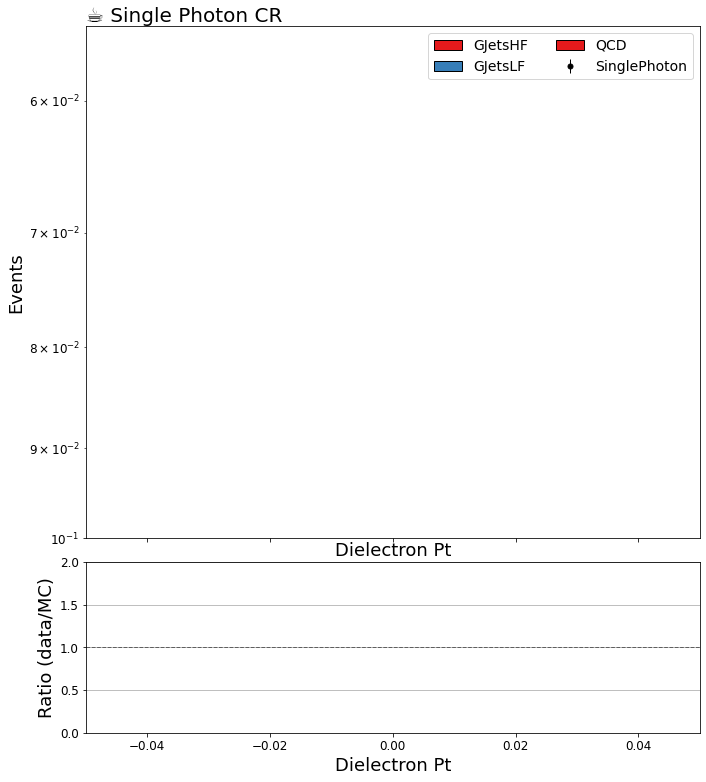

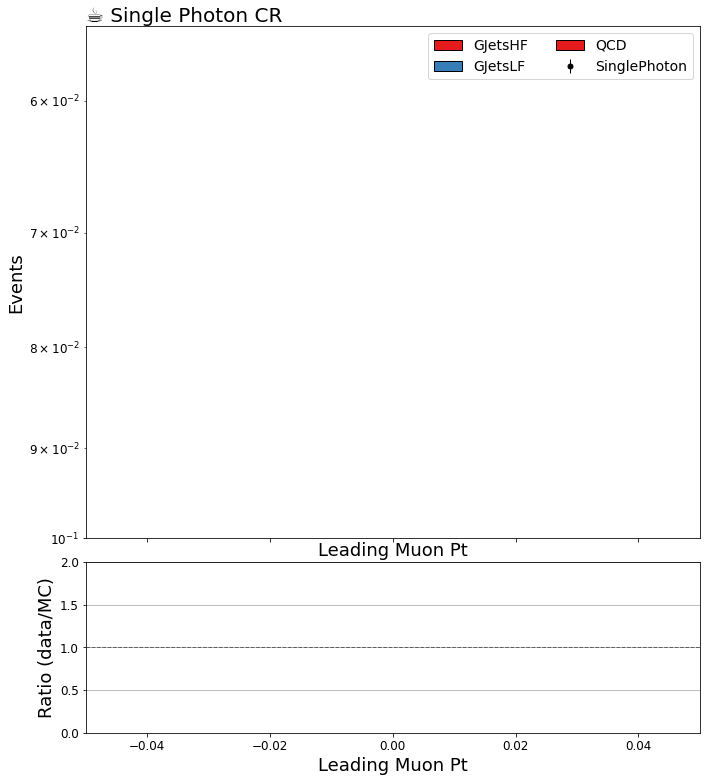

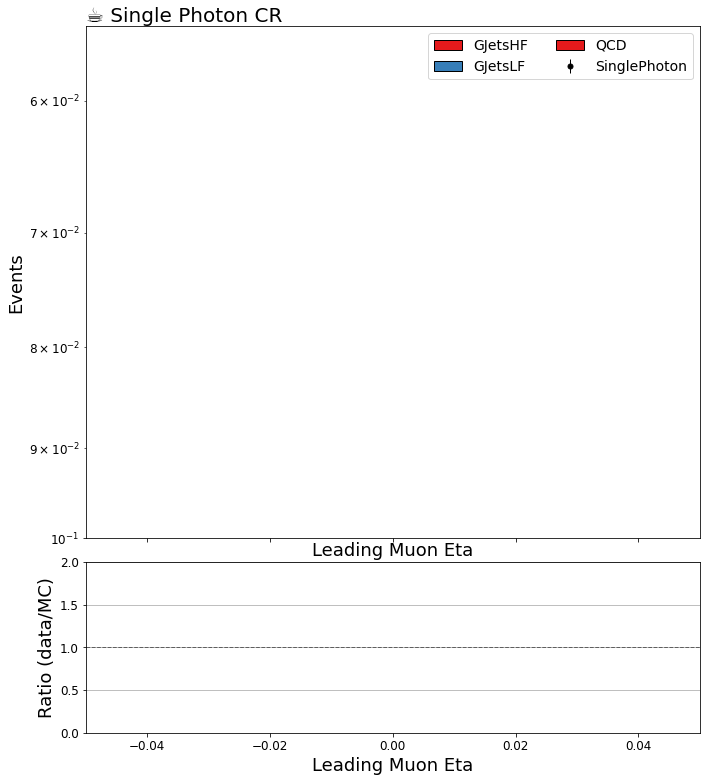

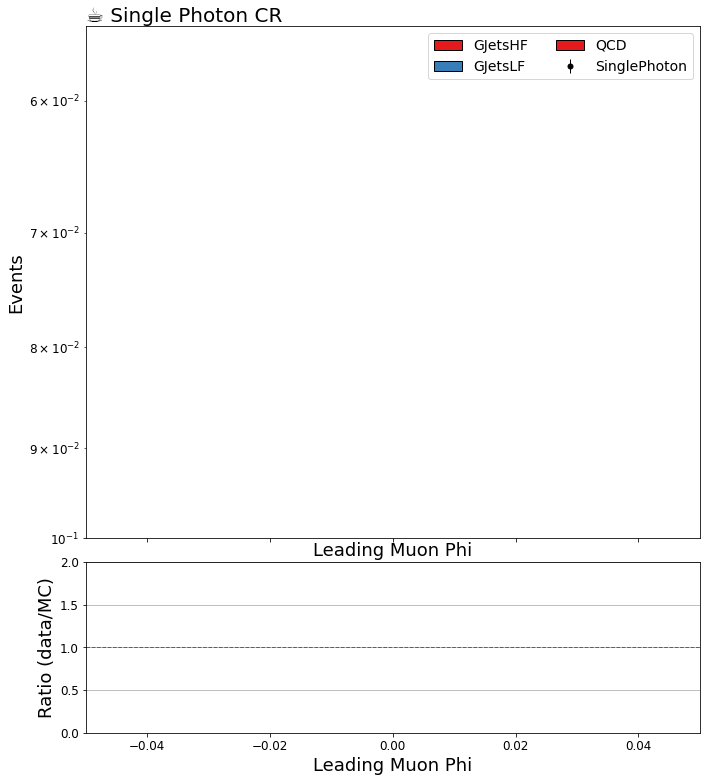

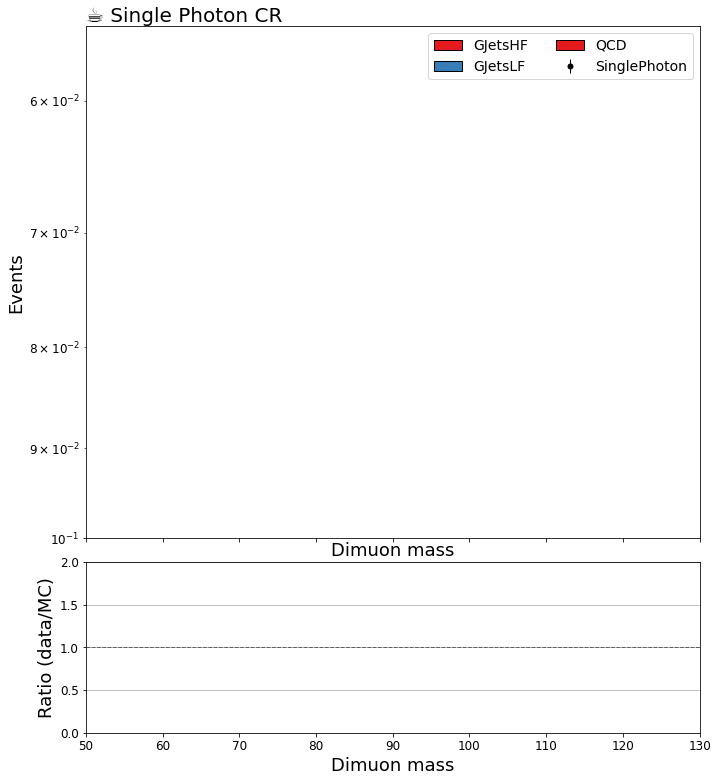

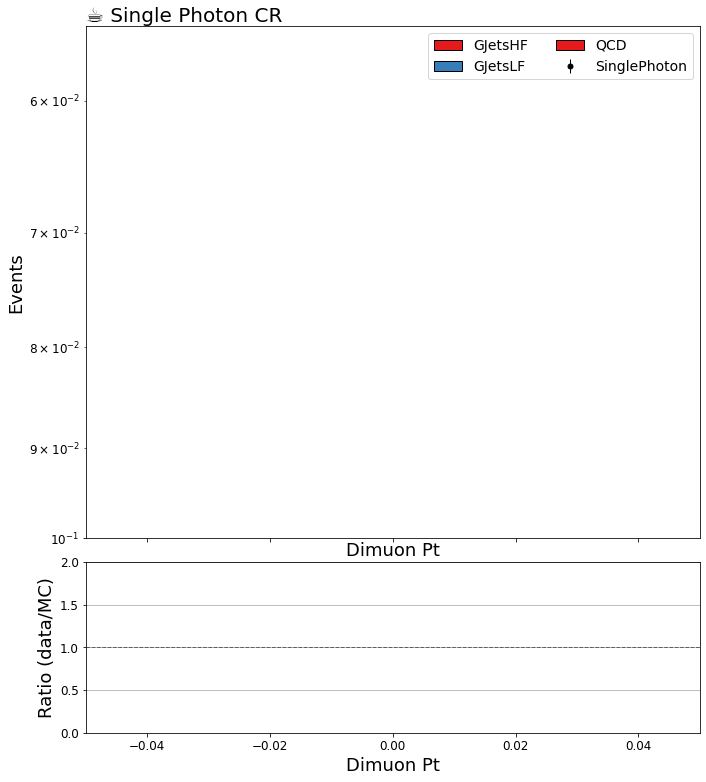

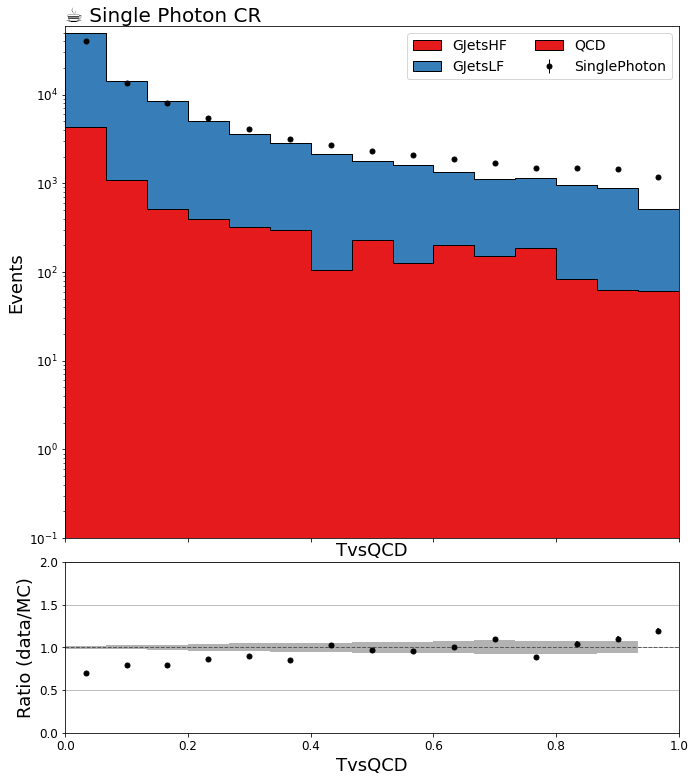

In [11]:
#### Gamma CR ####

#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler


if not os.path.exists('unstack_'):
    os.makedirs('unstack_')
    
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
R['zecr'] = 'Double Electron Z CR'
R['zmcr'] = 'Double Muon Z CR'
R['gcr'] = 'Single Photon CR'

sys = 'nominal'

for key in bkg_hists.keys():
    if key=='sumw': continue

    
    for j in bkg_hists[key].identifiers('region'):
        
        if not str(j) == 'gcr': continue
        #if 'mass' in str(j): continue
        #if 'mono' in str(j): continue
        #if not str(j) == 'gcr': continue
        #if str(j) == 'sr' or str(j) == 'gcr': continue
        #if str(j) == 'wmcr' or str(j) == 'tmcr' or str(j) == 'wecr' or str(j) == 'tecr':
        #    if key == 'dielemass' or key == 'dimumass': continue
            
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        colors = ['#e41a1c', '#377eb8']
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        #colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        

        plot.plot1d(data_hists[key].integrate('systematic',sys).integrate('region',j)[data[str(j)]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('systematic',sys).integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=False,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('systematic',sys).integrate('region',j).integrate('process',data[str(j)]), 
                   bkg_hists[key].integrate('systematic',sys).integrate('region',j).sum('process'),
                   ax=rax,
                   overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j)], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        plot_path = os.path.abspath('unstack_')
        plot_name = 'unstack_'+key+'_'+R[str(j)]+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

In [34]:
 bkg_hists['recoilVSmindphi'].identifiers('recoil')

[<Interval ([250, 280)) instance at 0x11d4974d0>,
 <Interval ([280, 310)) instance at 0x11d497a10>,
 <Interval ([310, 340)) instance at 0x11d497590>,
 <Interval ([340, 370)) instance at 0x11d4978d0>,
 <Interval ([370, 400)) instance at 0x11d497e50>,
 <Interval ([400, 430)) instance at 0x11d4973d0>,
 <Interval ([430, 470)) instance at 0x11d497c90>,
 <Interval ([470, 510)) instance at 0x11d497490>,
 <Interval ([510, 550)) instance at 0x11d497190>,
 <Interval ([550, 590)) instance at 0x11d497310>,
 <Interval ([590, 640)) instance at 0x11d497290>,
 <Interval ([640, 690)) instance at 0x11d497810>,
 <Interval ([690, 740)) instance at 0x11d4971d0>,
 <Interval ([740, 790)) instance at 0x11d497750>,
 <Interval ([790, 840)) instance at 0x11d497210>,
 <Interval ([840, 900)) instance at 0x11d497ad0>,
 <Interval ([900, 960)) instance at 0x11d4979d0>,
 <Interval ([960, 1020)) instance at 0x11d497110>,
 <Interval ([1020, 1090)) instance at 0x11d497050>,
 <Interval ([1090, 1160)) instance at 0x11d4977

[<StringBin (gcr) instance at 0x1197e6b50>, <StringBin (sr) instance at 0x1197e6990>, <StringBin (tecr) instance at 0x1197e6a90>, <StringBin (tmcr) instance at 0x1197e6a10>, <StringBin (wecr) instance at 0x1197e6a50>, <StringBin (wmcr) instance at 0x1197e69d0>, <StringBin (zecr) instance at 0x1197e6b10>, <StringBin (zmcr) instance at 0x1197e6ad0>]


ValueError: Cannot add this histogram with histogram <Hist (process,fj1pt) instance at 0x122c6ce10> of dissimilar dimensions

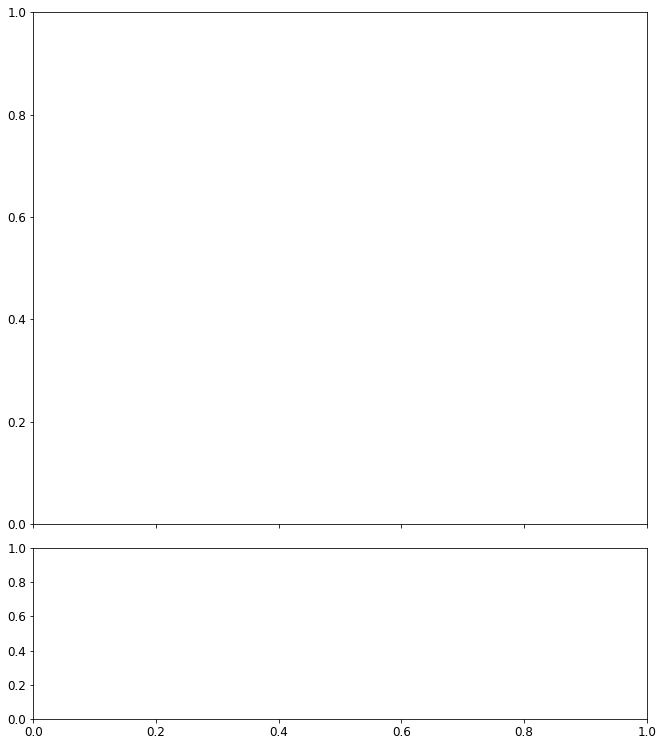

In [16]:
key1 = 'recoil'
key2 = 'fj1pt'
 
plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
colors = ['#e41a1c', '#377eb8']

fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

plot.plot1d(data_hists[key1].integrate('systematic',sys).integrate('region','gcr')[data[str('gcr')]]+data_hists[key2].integrate('systematic',sys).integrate('region','gcr')[data[str('gcr')]],
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
           )

plot.plot1d(bkg_hists[key1].integrate('systematic',sys).integrate('region','gcr')+bkg_hists[key2].integrate('systematic',sys).integrate('region','gcr'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=False,
            fiil_opts=fill_opts,
            error_opts=error_opts
           )

plot.plotratio(data_hists[key1].integrate('systematic',sys).integrate('region','gcr').integrate('process',data[str('gcr')])+data_hists[key2].integrate('systematic',sys).integrate('region','gcr').integrate('process',data[str('gcr')]),
               bkg_hists[key1].integrate('systematic',sys).integrate('region','gcr').sum('process')+bkg_hists[key2].integrate('systematic',sys).integrate('region','gcr').sum('process'),
               ax=rax,
               overflow='over',
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )
        
rax.set_ylabel('Ratio (data/MC)')
rax.set_ylim(0.0,2.0)
rax.grid(axis='y')
        
ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
args = {'linestyle':'--', 'linewidth': 5}
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
ax.set_ylim(.1, None)
leg = ax.legend(ncol=2, loc='best')
        
coffee = plt.text(0., 1., u"☕ "+R[str(j)], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
plot_path = os.path.abspath('unstack_')
plot_name = 'check_unstack_'+key1+'+'+key2+'_'+R[str('gcr')]+'.png'
fig.savefig(os.path.join(plot_path, plot_name))



In [24]:

#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler


if not os.path.exists('unstack'):
    os.makedirs('unstack')
    
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
R['zecr'] = 'Double Electron Z CR'
R['zmcr'] = 'Double Muon Z CR'
R['gcr'] = 'Single Photon CR'

sys = 'nominal'

for key in bkg_hists.keys():
    #if key=='sumw': continue
    #if not key == 'fjmass': continue
    if not (key == 'recoil'): continue # or key == 'ZHbbvsQCD'): continue    

    
    for j in bkg_hists[key].identifiers('region'):
        
        #if not str(j) == 'sr': continue
        #if 'mass' in str(j): continue
        if not 'mass4' in str(j): continue
        if 'gcr' in str(j): continue
        if 'mono' in str(j): continue
        #if str(j) == 'gcr': continue
        #if str(j) == 'zecr' or str(j) == 'zmcr': continue
        #if not str(j) == 'gcr': continue
        #if str(j) == 'sr' or str(j) == 'gcr': continue
        #if str(j) == 'wmcr' or str(j) == 'tmcr' or str(j) == 'wecr' or str(j) == 'tecr':
        #    if key == 'dielemass' or key == 'dimumass': continue
            
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ede536', '#a65628', '#f781bf', '#999999']
        #colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#b2df8a', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']
        
        fig, ax = plt.subplots(1, 1, figsize=(10,10))
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))

        plot.plot1d(bkg_hists[key].integrate('systematic',sys).integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=False,
                   )
        '''
        plot.plot1d(signal_hists[key].integrate('systematic',sys).integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=False,
                   )
        '''

        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]]+" "+str(j).split('_')[1], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        plot_path = os.path.abspath('unstack')
        plot_name = 'unstack_'+key+'_'+R[str(j).split('_')[0]]+'_'+str(j).split('_')[1]+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))